# 02. Clasificacion de redes neuronales con PyToch

La clasificacion es un problema de predecir si algo es una cosa u otra (puede haber mas de una sola opcion)

Fuente: https://www.learnpytorch.io/pytorch_2_intro/

## 1. Crear los datos para la clasificacion y prepararlos.

In [1]:
import sklearn
from sklearn.datasets import make_circles

Ver: https://scikit-learn.org/stable/datasets/toy_dataset.html

In [2]:
# Make 1000 samples
n_samples = 1000

# Create circles
x, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)       # Equivalente a setear la seed

In [3]:
print(f"Primeros 5 valores de X: \n{x[:5]}")
print(f"Primeros 5 valores de y: \n{y[:5]}")

Primeros 5 valores de X: 
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
Primeros 5 valores de y: 
[1 1 1 1 0]


In [4]:
# Crear un dataframe con los datos
import pandas as pd

circulos = pd.DataFrame({"X0": x[:, 0],
                         "X1": x[:, 1],
                         "label": y})

circulos.head(10)

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


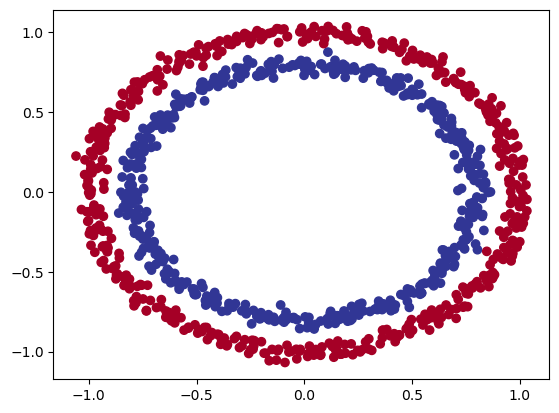

In [5]:
# Visualizar los datos

import matplotlib.pyplot as plt
plt.scatter(x[:, 0],
            x[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu)

### 1.1 Revisar las shapes de los datos tanto de los de input como de los de output

In [6]:
x.shape, y.shape

((1000, 2), (1000,))

In [7]:
x

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [8]:
# Ver el primer ejemplo de propiedaes y etiquetas
x_sample = x[0]
y_sample = y[0]

print(f"Valores para una muestra de x: {x_sample} y lo mismo para y: {y_sample}")  # Aqui podemos ver que con dos propiedades de x intentaremos predecir una muestra de y
print(f"Shape de x: {x_sample.shape} y de y: {y_sample.shape}")

Valores para una muestra de x: [0.75424625 0.23148074] y lo mismo para y: 1
Shape de x: (2,) y de y: ()


### 1.2 Convertir los datos a tensores de PyTorch y crear division de datos de entrenamiento y test

In [9]:
# Convertir los datos a tensores de PyTorch
import torch
torch.__version__

'2.4.1'

In [10]:
type(x)

numpy.ndarray

In [11]:
x = torch.from_numpy(x).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

x[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [12]:
type(x), x.dtype, y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [13]:
# Crear division de datos de entrenamiento y test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)  # 20% de los datos para test

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [14]:
len(x_train), len(x_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## 2. Crear el modelo

Crearemos un modelo para clasificar nuestros circulos azules y rojos.

Para esto queremos:
1. Crear un dispositivo que tenga en cuenta el dispositivo donde se ejecuta
2. Crear un modelo (una clase) que herede de nn.Module
3. Definir la funcion de perdida y el optimizador
4. Crear los ciclos de entrenamiento y testeo

In [15]:
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

Crearemos el modelo:
1. Ha de heredar de `nn.Module`
2. Crear 2 capas lineales con `nn.Linear`
3. Definir un metodo `forward` que pase los datos por las capas lineales
4. Instanciar el modelo y enviarlo al dispositivo

In [16]:
from sklearn import datasets

class CirculoModel(nn.Module):
    def __init__(self):
        super().__init__()

        self.layer1 = nn.Linear(in_features = 2, out_features = 8) # 2 propiedades de entrada y 5 neuronas en la capa oculta
        self.layer2 = nn.Linear(in_features = 8, out_features = 1)  # 5 neuronas en la capa oculta y 1 neurona de salida

    def forward(self, x):
        return self.layer2(self.layer1(x)) # Pasamos los datos por la capa 1 y luego por la capa 2

model = CirculoModel().to(device)
model

CirculoModel(
  (layer1): Linear(in_features=2, out_features=8, bias=True)
  (layer2): Linear(in_features=8, out_features=1, bias=True)
)

In [17]:
# se puede replicar lo de arriba con nn.Secuetial
model = nn.Sequential( # nn.Sequential es una clase que permite crear modelos de forma mas sencilla
    nn.Linear(in_features=2, out_features=8),
    nn.Linear(in_features=8, out_features=1)
).to(device)
model

Sequential(
  (0): Linear(in_features=2, out_features=8, bias=True)
  (1): Linear(in_features=8, out_features=1, bias=True)
)

In [18]:
model.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.1565, -0.1278],
                      [ 0.4074,  0.2938],
                      [-0.1427, -0.6548],
                      [-0.6852, -0.4667],
                      [ 0.5024, -0.2852],
                      [ 0.3556, -0.4881],
                      [ 0.4858, -0.4378],
                      [ 0.3081, -0.0124]])),
             ('0.bias',
              tensor([ 0.5994,  0.5729, -0.1133,  0.4329,  0.5601, -0.2106,  0.3070,  0.0896])),
             ('1.weight',
              tensor([[-0.2328,  0.2985, -0.0775,  0.1679, -0.3403, -0.2628,  0.0911,  0.3125]])),
             ('1.bias', tensor([0.1245]))])

In [19]:
# Hacrer predicciones con el modelo
with torch.inference_mode():
    predicciones_sin_entrenar = model(x_test.to(device))
print(f"Longitud de las predicciones: {len(predicciones_sin_entrenar)}, Forma: {predicciones_sin_entrenar.shape}")
print(f"Longitud de los datos de entrenamiento: {len(x_test)}, Forma: {x_test.shape}")
print(f"Primeras 10 predicciones: {predicciones_sin_entrenar[:10]}")
print(f"Primeras 10 etiquetas: {y_test[:10]}")

Longitud de las predicciones: 200, Forma: torch.Size([200, 1])
Longitud de los datos de entrenamiento: 200, Forma: torch.Size([200, 2])
Primeras 10 predicciones: tensor([[ 0.3697],
        [ 0.4177],
        [ 0.1219],
        [ 0.4404],
        [-0.0717],
        [-0.0409],
        [ 0.2477],
        [ 0.1398],
        [ 0.1304],
        [ 0.4188]])
Primeras 10 etiquetas: tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


### 2.1 Definir la funcion de perdida y el optimizador

Que funcion de perdida usaremos? https://pytorch.org/docs/stable/nn.html#loss-functions
Este problema es especifico.
Por ejemplo, para regresion usamos MAE o MSE

Para clasificacion, por otro lado, usamos CrossEntropyLoss o CategoircalCrossEntropyLoss.
(https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a)

Y para el optimizador, usaremos SGD (Stochastic Gradient Descent) o Adam (https://pytorch.org/docs/stable/optim.html), sin envargo pytorch tiene muchos mas optimizadores integrados.

* Para la funcion de perdida usaremos `torch.nn.BCEWithLogitsLoss` (https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html#torch.nn.BCEWithLogitsLoss)

In [20]:
# Definir la funcion de perdida
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = tiene la funcion de activacion Sigmoid integrada

optimizer = torch.optim.SGD(params = model.parameters(), lr = 0.01) # SGD = Stochastic Gradient Descent

In [21]:
# Calcular la certeza, de 100 ejemplos, cuantos acierta nuestro modelo
def certeza_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

## 3. Entrenar el modelo

Para entrenar el modelo, necesitamos un ciclo de entrenamiento:
1. Forward pass: pasar los datos por el modelo
2. Calcular la perdida
3. Optimazer cero grad
4. Loss backward (backpropagation)
5. Optimizer step (gradient descent)

### 3.1 Pasar de logits a probabilidades a etiquetas

La salida de nuestro modelo son **logits** puros (https://en.wikipedia.org/wiki/Logit).
Podemos convertir estos logits en **predicciones de probabilidades** pasandolos por una funcion de activacion (e.g sigmoid para clasificacion binaria y softmax para clasificacion multiclase).

Entonces podremos convertir las probabilidades en etiquetas (0 o 1) mediante reondeo (clasificacion binaria) o cogiendo el `argmax` (clasificacion multiclase).

In [22]:
# Mirar los 5 primeros outputs del fordward pass en nuestros datos de test
with torch.inference_mode():
    y_logits = model(x_test.to(device))[:5]
y_logits

tensor([[ 0.3697],
        [ 0.4177],
        [ 0.1219],
        [ 0.4404],
        [-0.0717]])

In [23]:
# Convertir los logits en probabilidades con la funcion de activacion Sigmoid
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.5914],
        [0.6029],
        [0.5304],
        [0.6084],
        [0.4821]])

Para nuestros valores de probabilidad de prediccion, necesitamos utilizar un redondeo en ellos:
* `y_pred_probs` > 0.5 -> 1
* `y_pred_probs` < 0.5 -> 0

In [24]:
# Convertir las probabilidades en etiquetas
y_pred_labels = torch.round(y_pred_probs)
y_pred_labels

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [0.]])

In [25]:
# En una sola linea
y_pred_labels = torch.round(torch.sigmoid(model(x_test.to(device))[:5]))
y_pred_labels

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [0.]], grad_fn=<RoundBackward0>)

### 3.2 Crear el ciclo de entrenamiento y testeo

In [26]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Establecer el numero de epochs
epochs = 1000

# Poner los datos en el dispositivo
x_train, y_train = x_train.to(device), y_train.to(device)
x_test, y_test = x_test.to(device), y_test.to(device)

# Construir el ciclo de entrenamiento y evaluacion
for epoch in range(epochs):
    ### Entrenamiento ###
    model.train() # Poner el modelo en modo entrenamiento

    # Forward pass
    y_logits = model(x_train).squeeze() # squeeze() elimina las dimensiones de tamaño 1
    y_pred = torch.round(torch.sigmoid(y_logits)) # Convertir los logits en etiquetas pasando por porbabilidades

    # Calcular la perdida/certeza
    loss = loss_fn(y_logits, y_train) # Calcular la perdida, se necestian los logits y las etiquetas de entrenamiento
    acc = certeza_fn(y_true = y_train, y_pred = y_pred)

    # Optimizer zero grad
    optimizer.zero_grad() # Reiniciar los gradientes

    # loss backward
    loss.backward() # Calcular los gradientes

    # optimizer step
    optimizer.step() # Actualizar los parametros

    ### Testeo ###

    model.eval() # Poner el modelo en modo evaluacion
    with torch.inference_mode():
        # Forward pass
        test_logits = model(x_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        # Calcular la perdida/certeza
        test_loss = loss_fn(test_logits, y_test)
        test_acc = certeza_fn(y_true = y_test, y_pred = test_pred)

    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Perdida: {loss:.5f} | Certeza: {acc:.2f}% | Test perdida: {test_loss:.5f} | Test certeza: {test_acc:.2f}%")


Epoch: 0 | Perdida: 0.69884 | Certeza: 53.62% | Test perdida: 0.70574 | Test certeza: 51.50%
Epoch: 10 | Perdida: 0.69841 | Certeza: 54.00% | Test perdida: 0.70520 | Test certeza: 50.00%
Epoch: 20 | Perdida: 0.69803 | Certeza: 53.37% | Test perdida: 0.70471 | Test certeza: 49.00%
Epoch: 30 | Perdida: 0.69769 | Certeza: 53.12% | Test perdida: 0.70426 | Test certeza: 49.00%
Epoch: 40 | Perdida: 0.69738 | Certeza: 53.00% | Test perdida: 0.70384 | Test certeza: 49.00%
Epoch: 50 | Perdida: 0.69710 | Certeza: 52.62% | Test perdida: 0.70347 | Test certeza: 50.00%
Epoch: 60 | Perdida: 0.69685 | Certeza: 52.62% | Test perdida: 0.70312 | Test certeza: 49.50%
Epoch: 70 | Perdida: 0.69662 | Certeza: 52.38% | Test perdida: 0.70280 | Test certeza: 49.00%
Epoch: 80 | Perdida: 0.69641 | Certeza: 52.38% | Test perdida: 0.70250 | Test certeza: 50.50%
Epoch: 90 | Perdida: 0.69622 | Certeza: 52.50% | Test perdida: 0.70223 | Test certeza: 51.00%
Epoch: 100 | Perdida: 0.69605 | Certeza: 52.25% | Test perdid

## 4. Haz predicciones con el modelo entrenado y evalua el modelo

Parece que el modelo no esta aprendiendo nada
Asi que haremos mas predicciones y hacerlas visuales

Para ello, vamos a importar una funcion llamada `plot_decision_boundary` que nos ayudara a visualizar las predicciones de nuestro modelo.

In [27]:
import requests
from pathlib import Path

# Descargar funciones de apoyo del repositorio de github
if Path("helper_functions.py").is_file():
    print("Este arcivo ya existe")
else:
    print("Descargando archivo...")
    r = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")

    with open("helper_functions.py", "wb") as f:
        f.write(r.content)

# Importar las funciones de apoyo
from helper_functions import plot_decision_boundary, plot_predictions

Este arcivo ya existe


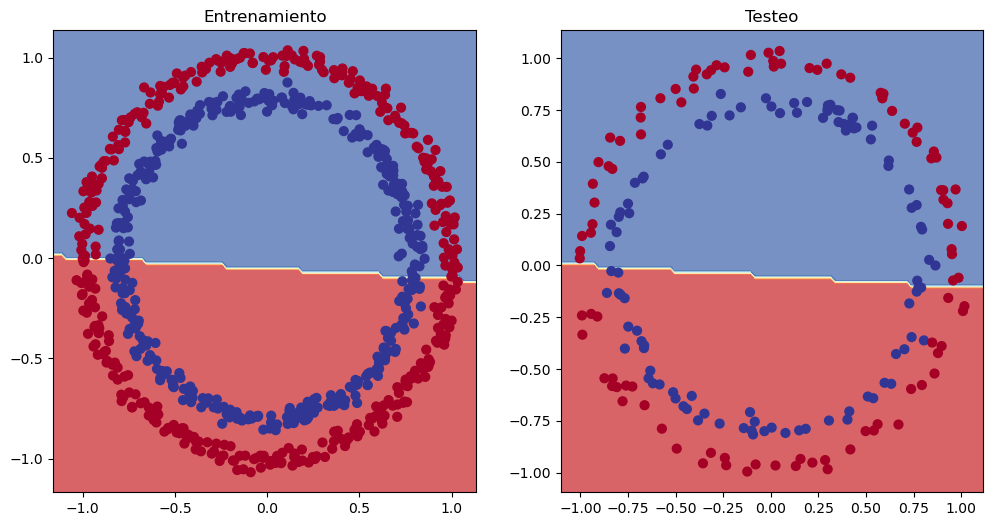

In [28]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Entrenamiento")
plot_decision_boundary(model, x_train, y_train)

plt.subplot(1, 2, 2)
plt.title("Testeo")
plot_decision_boundary(model, x_test, y_test)

## 5. Mejorar el modelo

* Aumentar el numero de capas
* Aumentar el numero de unidades ocultas (ahora hay 8)
* Aumentar el numero de epochs
* Cambiar la funcion de activacion de la capa de salida (ahora es una sigmoid)
* Cambiar el Lr del optimizador

Estas opciones son desde la perspectiva del modelo, ya que se centran en el modelo en si mismo, mas no en los datos.

In [29]:
class CirculoModel_V1(nn.Module):
    def __init__(self):
        super().__init__()

        self.layer1 = nn.Linear(in_features = 2, out_features = 10)
        self.layer2 = nn.Linear(in_features = 10, out_features = 10)
        self.layer3 = nn.Linear(in_features = 10, out_features = 1)

    def forward(self, x):
        return self.layer3(self.layer2(self.layer1(x)))

model_v1 = CirculoModel_V1().to(device)
model_v1

CirculoModel_V1(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
)

In [30]:
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params = model_v1.parameters(), lr = 0.1)

In [31]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Establecer el numero de epochs
epochs = 1000

# Poner los datos en el dispositivo
x_train, y_train = x_train.to(device), y_train.to(device)
x_test, y_test = x_test.to(device), y_test.to(device)

# Construir el ciclo de entrenamiento y evaluacion
for epoch in range(epochs):
    ### Entrenamiento ###
    model_v1.train() # Poner el modelo en modo entrenamiento

    # Forward pass
    y_logits = model_v1(x_train).squeeze() # squeeze() elimina las dimensiones de tamaño 1
    y_pred = torch.round(torch.sigmoid(y_logits)) # Convertir los logits en etiquetas pasando por porbabilidades

    # Calcular la perdida/certeza
    loss = loss_fn(y_logits, y_train) # Calcular la perdida, se necestian los logits y las etiquetas de entrenamiento
    acc = certeza_fn(y_true = y_train, y_pred = y_pred)

    # Optimizer zero grad
    optimizer.zero_grad() # Reiniciar los gradientes

    # loss backward
    loss.backward() # Calcular los gradientes

    # optimizer step
    optimizer.step() # Actualizar los parametros

    ### Testeo ###

    model_v1.eval() # Poner el modelo en modo evaluacion
    with torch.inference_mode():
        # Forward pass
        test_logits = model_v1(x_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        # Calcular la perdida/certeza
        test_loss = loss_fn(test_logits, y_test)
        test_acc = certeza_fn(y_true = y_test, y_pred = test_pred)

    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Perdida: {loss:.5f} | Certeza: {acc:.2f}% | Test perdida: {test_loss:.5f} | Test certeza: {test_acc:.2f}%")

Epoch: 0 | Perdida: 0.69396 | Certeza: 50.88% | Test perdida: 0.69261 | Test certeza: 51.00%
Epoch: 10 | Perdida: 0.69369 | Certeza: 50.25% | Test perdida: 0.69270 | Test certeza: 50.00%
Epoch: 20 | Perdida: 0.69351 | Certeza: 50.12% | Test perdida: 0.69283 | Test certeza: 49.50%
Epoch: 30 | Perdida: 0.69339 | Certeza: 50.50% | Test perdida: 0.69297 | Test certeza: 48.00%
Epoch: 40 | Perdida: 0.69329 | Certeza: 50.38% | Test perdida: 0.69310 | Test certeza: 49.00%
Epoch: 50 | Perdida: 0.69322 | Certeza: 49.88% | Test perdida: 0.69324 | Test certeza: 50.00%
Epoch: 60 | Perdida: 0.69317 | Certeza: 49.38% | Test perdida: 0.69336 | Test certeza: 51.50%
Epoch: 70 | Perdida: 0.69312 | Certeza: 49.38% | Test perdida: 0.69348 | Test certeza: 50.50%
Epoch: 80 | Perdida: 0.69309 | Certeza: 50.12% | Test perdida: 0.69359 | Test certeza: 50.00%
Epoch: 90 | Perdida: 0.69307 | Certeza: 50.50% | Test perdida: 0.69370 | Test certeza: 48.50%
Epoch: 100 | Perdida: 0.69305 | Certeza: 50.38% | Test perdid

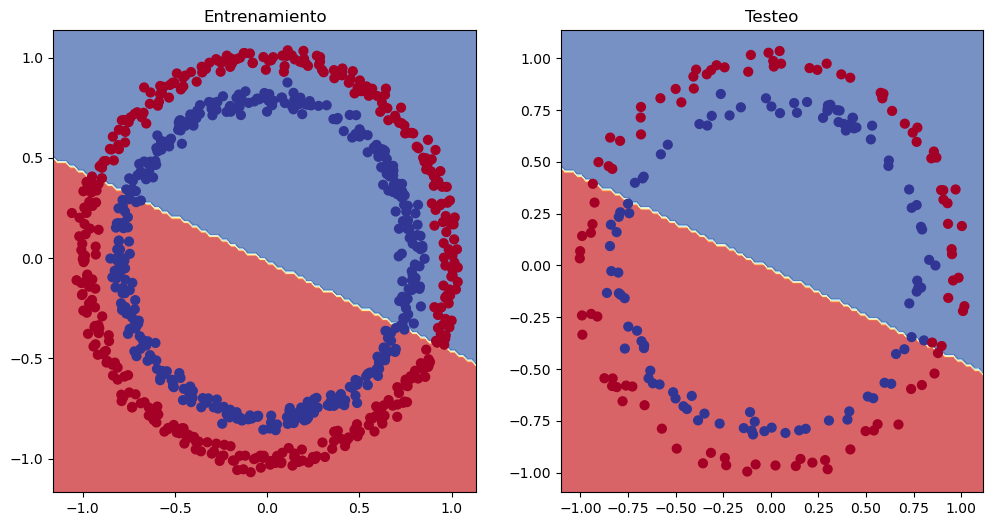

In [32]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Entrenamiento")
plot_decision_boundary(model_v1, x_train, y_train)

plt.subplot(1, 2, 2)
plt.title("Testeo")
plot_decision_boundary(model_v1, x_test, y_test)

### 5.1 Preparar los datos para ver si el modelo puede modelar una linea recta
Primero vamos a crear algunos datos lineales a ver si nuestro modelo puede modelarlos

In [33]:
# Create some data (same as notebook 01)
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# Create data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias # linear regression formula

# Check the data
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

Ahora vamos a separar nuestros datos en datos de entrenamiento y testeo

In [34]:
entrenamiento = int(0.8 * len(X_regression)) # 80% de los datos para entrenamiento
X_train_regression, X_test_regression = X_regression[:entrenamiento], X_regression[entrenamiento:]
y_train_regression, y_test_regression = y_regression[:entrenamiento], y_regression[entrenamiento:]

# Comprobamos la longitud de cada conjunto
len(X_train_regression), len(X_test_regression), len(y_train_regression), len(y_test_regression)

(80, 20, 80, 20)

Ahora, utilizaremos la funcion `plot_predictions` para visualizar los datos de entrenamiento y testeo

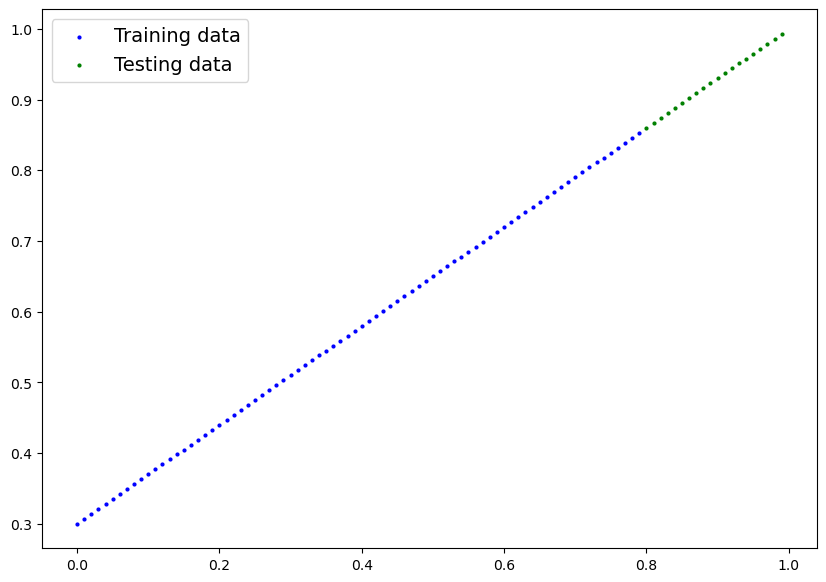

In [35]:
plot_predictions(train_data=X_train_regression, 
                 train_labels=y_train_regression, 
                 test_data=X_test_regression, 
                 test_labels=y_test_regression, 
                 )

### 5.2 Ajustar el modelo para que encaje con una linea recta

In [36]:
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

Vamos a preparar la funcion de perdida y el optimizador

In [37]:
loss_fn = nn.L1Loss() # L1Loss = Mean Absolute Error
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.01) # SGD = Stochastic Gradient Descent

Ahora vamos a entrenar el modelo para 1000 epochs

In [38]:
torch.manual_seed(42)
epochs = 1000

X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

for epoch in range(epochs):
    ### Entrenamiento ###
    # 1. Forward pass
    y_pred_regression = model_2(X_train_regression)
    
    # 2. Calcular la perdida (esto no tendra certeza ya que hablamos de un problema de regresion, no de clasificacion)
    loss = loss_fn(y_pred_regression, y_train_regression)
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()
    
    # 4. Loss backward
    loss.backward()
    
    # 5. Optimizer step
    optimizer.step()
    
    ### Testeo ###
    model_2.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_preds_regression = model_2(X_test_regression)
        # 2. Calcular la perdida
        test_loss = loss_fn(test_preds_regression, y_test_regression)
        
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Perdida: {loss:.5f} | Test perdida: {test_loss:.5f}")

Epoch: 0 | Perdida: 0.75986 | Test perdida: 0.91103
Epoch: 100 | Perdida: 0.02858 | Test perdida: 0.00081
Epoch: 200 | Perdida: 0.02533 | Test perdida: 0.00209
Epoch: 300 | Perdida: 0.02137 | Test perdida: 0.00305
Epoch: 400 | Perdida: 0.01964 | Test perdida: 0.00341
Epoch: 500 | Perdida: 0.01940 | Test perdida: 0.00387
Epoch: 600 | Perdida: 0.01903 | Test perdida: 0.00379
Epoch: 700 | Perdida: 0.01878 | Test perdida: 0.00381
Epoch: 800 | Perdida: 0.01840 | Test perdida: 0.00329
Epoch: 900 | Perdida: 0.01798 | Test perdida: 0.00360


Para empezar podemos ver como la perdida disminuye a lo largo de las epochs.
Vamos a mostrar las predicciones de nuestro modelo para visualizarlo

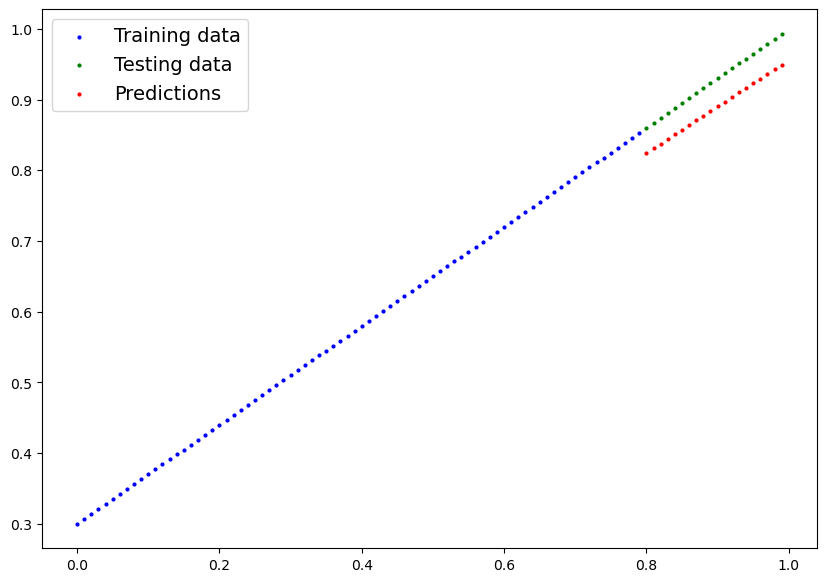

In [39]:
model_2.eval()

# Hacer predicciones
with torch.inference_mode():
    y_preds_regression = model_2(X_test_regression)
    
# Visualizar las predicciones
plot_predictions(train_data=X_train_regression.cpu(),
                train_labels=y_train_regression.cpu(),
                test_data=X_test_regression.cpu(),
                test_labels=y_test_regression.cpu(),
                predictions=y_preds_regression.cpu()
                )

Parece ser que el modelo es capaz de aprender.
Asi que cual podria ser el problema entonces?

## 6. La pieza faltante: la no linealidad
Hemos visto como nuestro modelo puede dibujar una linea recta, pero no puede dibujar un circulo.
Y como podriamos darle la capacidad para dibujar una figura no lineal?

### 6.1 Recreando datos no lineales
Primero vamos a crear datos nuevos para comenzar de 0

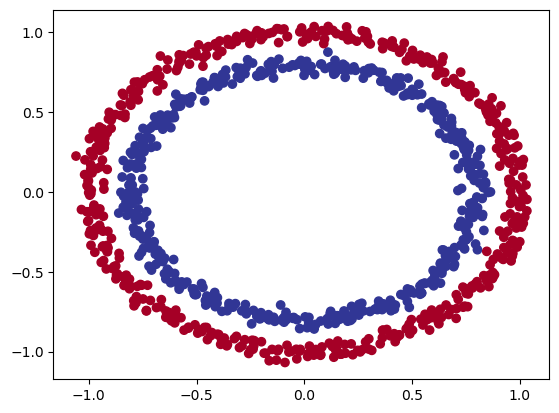

In [40]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples=n_samples, noise=0.03, random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

Ahora vamos a separar los datos de entrenamiento y testeo

In [41]:
import torch
from sklearn.model_selection import train_test_split

# Convertir los datos a tensores
X = torch.from_numpy(X).type(torch.float)
Y = torch.from_numpy(y).type(torch.float)

# Crear division de datos de entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

### 6.2 Crear un modelo con no linealidad

Que patron se podria utilizar para dibujar lineas tanto lineales como no lineales?
Pytorch ya tiene varias funciones de activacion integradas, como ReLU, Sigmoid, Tanh, Softmax, etc.

In [42]:
from torch import nn
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU() # <- añade ReLU con la no linealidad

    def forward(self, x):
        # Intercalar las capas con ReLU
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
print(model_3)

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


In [43]:
# Definir la funcion de perdida y el optimizador
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(), lr=0.1)

### 6.3 Entrenar el modelo con no linealidad

In [44]:
torch.manual_seed(42)
epochs = 1000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    # 1. Forward pass
    y_logits = model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> probabilidades -> etiquetas
    
    # 2. Calcular la perdida
    loss = loss_fn(y_logits, y_train) # BCEWithLogitsLoss necesita los logits y las etiquetas de entrenamiento
    acc = certeza_fn(y_true=y_train, y_pred=y_pred)
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()
    
    # 4. Loss backward
    loss.backward()
    
    # 5. Optimizer step
    optimizer.step()
    
    # Testeo
    model_3.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_3(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Calcular la perdida
        test_loss = loss_fn(test_logits, y_test)
        test_acc = certeza_fn(y_true=y_test, y_pred=test_pred)
        
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Perdida: {loss:.5f} | Certeza: {acc:.2f}% | Test perdida: {test_loss:.5f} | Test certeza: {test_acc:.2f}%")

Epoch: 0 | Perdida: 0.69295 | Certeza: 50.00% | Test perdida: 0.69319 | Test certeza: 50.00%
Epoch: 100 | Perdida: 0.69115 | Certeza: 52.88% | Test perdida: 0.69102 | Test certeza: 52.50%
Epoch: 200 | Perdida: 0.68977 | Certeza: 53.37% | Test perdida: 0.68940 | Test certeza: 55.00%
Epoch: 300 | Perdida: 0.68795 | Certeza: 53.00% | Test perdida: 0.68723 | Test certeza: 56.00%
Epoch: 400 | Perdida: 0.68517 | Certeza: 52.75% | Test perdida: 0.68411 | Test certeza: 56.50%
Epoch: 500 | Perdida: 0.68102 | Certeza: 52.75% | Test perdida: 0.67941 | Test certeza: 56.50%
Epoch: 600 | Perdida: 0.67515 | Certeza: 54.50% | Test perdida: 0.67285 | Test certeza: 56.00%
Epoch: 700 | Perdida: 0.66659 | Certeza: 58.38% | Test perdida: 0.66322 | Test certeza: 59.00%
Epoch: 800 | Perdida: 0.65160 | Certeza: 64.00% | Test perdida: 0.64757 | Test certeza: 67.50%
Epoch: 900 | Perdida: 0.62362 | Certeza: 74.00% | Test perdida: 0.62145 | Test certeza: 79.00%


### 6.4 Evaluar el modelo con no linealidad

In [45]:
model_3.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10], y_test[:10]

(tensor([1., 0., 1., 0., 0., 1., 0., 0., 1., 0.]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

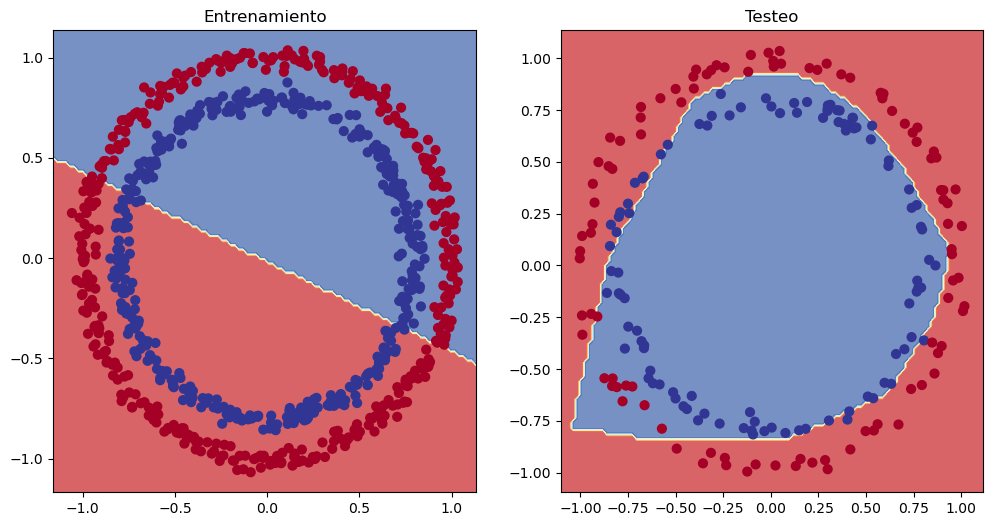

In [46]:
# Plotear las predicciones
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Entrenamiento")
plot_decision_boundary(model_v1, X_train, y_train) # Modelo 1 sin no linearidad
plt.subplot(1, 2, 2)
plt.title("Testeo")
plot_decision_boundary(model_3, X_test, y_test) # Modelo 3 tiene no linearidad

## 7.Replicando las funciones de activacion no lineales
Como hemos visto antes meter capas de activiacions no lineles puede ayudar a que nuestro modelo aprenda patrones no lineales.
Pero como se ve una funcion de activacion no lineal?

In [47]:
#Crearemos un tensor de juguete similar a los datos que van en nuestros modelos
A = torch.arange(-10, 10, 1, dtype=torch.float32)
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

Perfecto, ahora vamos a visulizar este tensor

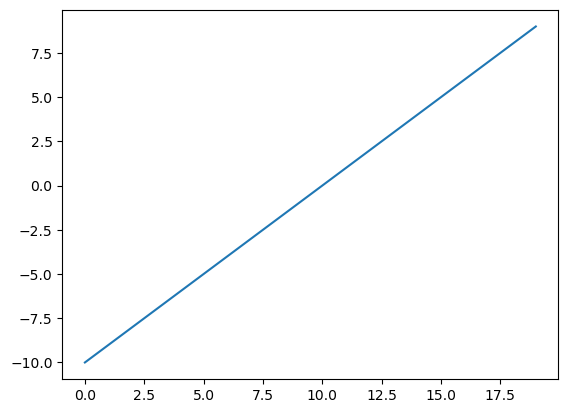

In [48]:
plt.plot(A)

Como se puede ver, esto nos da una linea recta
Ahora vamos a ver como es influenciado este tensor por una funcion de activacion no lineal como ReLU
Sin envargo, en lugar de utilizar directamente la funcion de activacion ReLU de pytorch, vamos a replicarla manualmente
La funcion ReLU es simple:
* Si el valor es mayor o igual que 0, mantenerlo
* Si el valor es menor que 0, cambiarlo a 0

In [49]:
def relu(x):
    return torch.maximum(torch.tensor(0), x)

# Aplicar la funcion ReLU a nuestro tensor A
relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

Parece que ha funcionado y cambiado los valores negativos a 0
Ahora vamos a visualizarlo

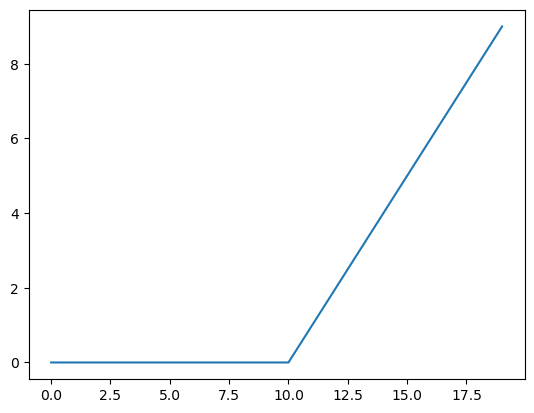

In [50]:
plt.plot(relu(A))

Y como se ve la funcion sigmoide que tambien hemos estado usando?
La formula de la funcion sigmoide es:
$$ out_i = \frac{1}{1 + e^{-x_i}} $$
O si usamos $x$ como input:
$$ S(x) = \frac{1}{1 + e^{-x}} $$
donde $S$ significa sigmoide, $e$ es el exponencial (torch.exp()) y $i$ es un elemento en el tensor.

In [51]:
def sigmoid(x):
    return 1 / (1 + torch.exp(-x))

# Aplicar la funcion sigmoide a nuestro tensor A
sigmoid(A)

tensor([4.5398e-05, 1.2339e-04, 3.3535e-04, 9.1105e-04, 2.4726e-03, 6.6929e-03,
        1.7986e-02, 4.7426e-02, 1.1920e-01, 2.6894e-01, 5.0000e-01, 7.3106e-01,
        8.8080e-01, 9.5257e-01, 9.8201e-01, 9.9331e-01, 9.9753e-01, 9.9909e-01,
        9.9966e-01, 9.9988e-01])

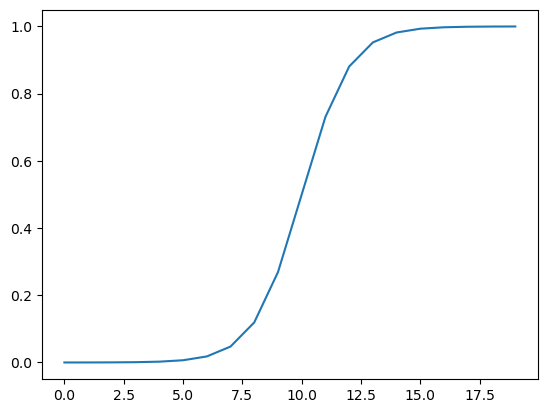

In [52]:
plt.plot(sigmoid(A))

Genial, ahora hemos pasado de una linea recta a una curva en forma de S
Existen muchas funciones de activacion no lineales en pytorch que no hemos probado pero estas 2 serian las mas comunes.
Ya teniendo funciones tanto lineares como no lineares, podemos modelar casi cualquier patron en nuestros datos.
En lugar de decirle a nuestro modelo que hacer, le damos los datos y las herramientas para que aprenda los patrones por si mismo.

## 8. Poniendo todo junto en un modelo multi-clase de Pytorch


### 8.1 Crear los datos
Para iniciar con el problema de clasificacion multi-clase, vamos a crear algunos datos multi-clase
Para hacerlo, podemos hacer uso de la funcion `make_blobs` de sklearn
Estos metodos nos permiten crear datos de multiples clases.
Especificamente, vamos a hacer lo siguiente:
1. Crear datos multi-clase con `make_blobs`
2. Convertir los datos a tensores de Pytorch
3. Dividir los datos en datos de entrenamiento y testeo usando `train_test_split`
4. Visualizar los datos

X_blob: tensor([[-9.2394,  9.6428],
        [ 7.1594, -9.0778],
        [-6.4332,  2.1169],
        [-8.6693,  3.7422],
        [-6.5669,  2.0423]]), y_blob: tensor([3, 0, 1, 2, 1])


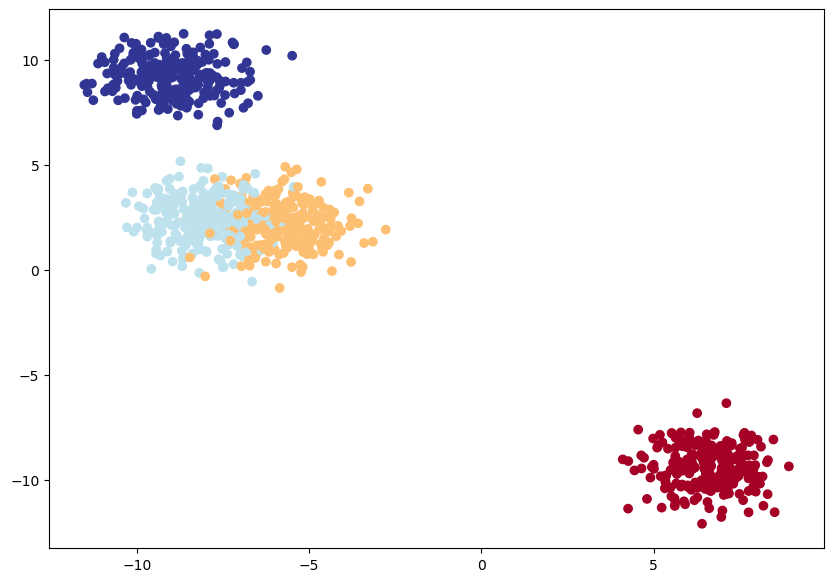

In [197]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Setear los hyperparametros para la creacion de los datos
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 52

# 1.
X_blob, y_blob = make_blobs(n_samples=1000,
                            centers=NUM_CLASSES,
                            n_features=NUM_FEATURES,
                            random_state=RANDOM_SEED,
                            cluster_std=1.0
                            )

# 2.
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor) 
print(f"X_blob: {X_blob[:5]}, y_blob: {y_blob[:5]}")

# 3.
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size=0.2,
                                                                        random_state=RANDOM_SEED
                                                                        )

# 4.
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu)

### 8.2 Crear un modelo multi-clase con Pytorch
Las redes neuronales son muy flexibles
Podriamos crear algo similar a `model_3` y que sea capaz de predecir multiples clases?
Para ello, vamos a crear una subclase de `nn.Module` que tome los siguientes superparametros:
* input_features: el numero de x tipos que entran en el modelo
* output_features: el numero ideal de tipos que queremos que salgan del modelo
* hidden_units: el numero de neuronas que queremos que cada capa oculta tenga


In [198]:
from torch import nn

class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        """
        Inicializa todos los hipermarametros para un modelo de clasificacion multi-clase
        
        Args:
        input_features: int, numero de features que entran en el modelo
        output_features: int, numero de features que queremos que salgan del modelo(igual al numero de clases que haya)
        hidden_units: int, numero de neuronas que queremos que cada capa oculta tenga
        """
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.ReLU(), # <- does our dataset require non-linear layers? (try uncommenting and see if the results change)
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(), # <- does our dataset require non-linear layers? (try uncommenting and see if the results change)
            nn.Linear(in_features=hidden_units, out_features=output_features), # how many classes are there?
        )
    def forward(self, x):
        return self.linear_layer_stack(x)
    
# Crear un modelo BlobModel
model_4 = BlobModel(input_features=NUM_FEATURES,
                    output_features=NUM_CLASSES,
                    hidden_units=8
                    ).to(device)
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

### 8.3 Definir la funcion de perdida y el optimizador para el modelo multi-clase

Ya que estamos trabajando en un problema de clasificacion multi-clase, vamos a usar `nn.CrossEntropyLoss` como nuestra funcion de perdida
Y para el optimizador, vamos a seguir usando `torch.optim.SGD` con un learning rate de 0.1

In [199]:
# Definir la funcion de perdida y el optimizador
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_4.parameters(),
                            lr=0.1)

### 8.4 Conseguir las probabilidades de prediccion de nuestro modelo multi-clase

In [200]:
# Vamos a ejecutar un unico forward pass a traves de nuestro modelo para ver que tipo de salidas obtenemos
model_4(X_blob_train.to(device))[:5]

tensor([[-3.5778e-01, -9.2489e-01, -7.6122e-01, -3.5237e-01],
        [ 1.1462e-01, -4.7467e-01, -1.0837e-01, -7.4453e-04],
        [-3.6929e-01, -9.5535e-01, -8.0032e-01, -3.6602e-01],
        [ 6.7127e-02, -5.8191e-01, -2.1219e-01, -2.5797e-02],
        [ 1.0080e-01, -5.0769e-01, -1.3408e-01, -3.5576e-03]],
       grad_fn=<SliceBackward0>)

Aqui podemos ver que aparenta que estamos obteniendo probabilidades de salida para cada clase.

Vamos a comprobarlo

In [201]:
# Cuantos elementos hay en un unico batch de datos de entrenamiento?
model_4(X_blob_train.to(device))[0].shape, NUM_CLASSES

(torch.Size([4]), 4)

Efectivamente, tenemos 4 elementos en la salida de nuestro modelo, uno para cada clase.

Actualmente, nuestro modelo esta devolviendo logits, pero como podriamos saber exactamente que label es la que tiene la probabilidad mas alta?

De esta manera, queremos saber como pasar de `logits -> probabilidades -> etiquetas` tal como hicimos en los problemas de clasificacion binaria.

Aqui es donde entra en juego la funcion de activacion `softmax`.

La funcion `softmax` calcula la probabilidad de cada clase en un problema de clasificacion multi-clase.

In [202]:
# Hacer logits de prediccion con el modelo
y_logits = model_4(X_blob_train.to(device))

# Realizar el calculo softmax en los logits a traves de la dimension 1 para obtener probabilidades de prediccion
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-3.5778e-01, -9.2489e-01, -7.6122e-01, -3.5237e-01],
        [ 1.1462e-01, -4.7467e-01, -1.0837e-01, -7.4453e-04],
        [-3.6929e-01, -9.5535e-01, -8.0032e-01, -3.6602e-01],
        [ 6.7127e-02, -5.8191e-01, -2.1219e-01, -2.5797e-02],
        [ 1.0080e-01, -5.0769e-01, -1.3408e-01, -3.5576e-03]],
       grad_fn=<SliceBackward0>)
tensor([[0.3086, 0.1750, 0.2061, 0.3103],
        [0.3081, 0.1709, 0.2465, 0.2745],
        [0.3116, 0.1734, 0.2025, 0.3126],
        [0.3135, 0.1638, 0.2371, 0.2857],
        [0.3090, 0.1682, 0.2444, 0.2784]], grad_fn=<SliceBackward0>)


Despues de pasar por la funcion de softmax, podemos ver que ahora tenemos probabilidades de prediccion para cada clase.

Y que los valores suman 1 para cada fila.

In [203]:
torch.sum(y_pred_probs[0])

tensor(1., grad_fn=<SumBackward0>)

Estas probabilidades nos estan diciendo esencialmente que tan seguro esta el modelo de que un punto de datos pertenezca a una clase en particular.

Dado que hay un valor por cada clase en y_pred_probs, podemos tomar el valor mas alto como la prediccion de nuestro modelo.

Podemos ver que indice tiene el mayor valor utilizando `torch.argmax()`

In [204]:
print(y_pred_probs[0])
print(torch.argmax(y_pred_probs[0]))

tensor([0.3086, 0.1750, 0.2061, 0.3103], grad_fn=<SelectBackward0>)
tensor(3)


Podemos ver que nos da el indice de la clase que nuestro modelo piensa que es la correcta.

Ahora mismo es algo totalmente aleatorio, pero vamos a ver si podemos hacer que nuestro modelo aprenda a predecir correctamente.

### 8.5 Creando un ciclo de entrenamiento y testeo para el modelo multi-clase


In [205]:
torch.manual_seed(42)
epochs = 1000

X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):
    ### Entrenamiento ###

    # 1. Forward pass
    y_logits = model_4(X_blob_train)
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)
    
    # 2. Calcular la perdida y certeza
    loss = loss_fn(y_logits, y_blob_train)
    acc = certeza_fn(y_true=y_blob_train, y_pred=y_pred)
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()
    
    # 4. Loss backward
    loss.backward()
    
    # 5. Optimizer step
    optimizer.step()
    
    ### Testeo ###
    model_4.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_4(X_blob_test)
        test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
        
        # 2. Calcular la perdida y certeza
        test_loss = loss_fn(test_logits, y_blob_test)
        test_acc = certeza_fn(y_true=y_blob_test, y_pred=test_pred)
    
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Perdida: {loss:.5f} | Certeza: {acc:.2f}% | Test perdida: {test_loss:.5f} | Test certeza: {test_acc:.2f}%")

Epoch: 0 | Perdida: 1.37232 | Certeza: 24.50% | Test perdida: 1.38619 | Test certeza: 24.00%
Epoch: 100 | Perdida: 0.35486 | Certeza: 82.25% | Test perdida: 0.38994 | Test certeza: 77.00%
Epoch: 200 | Perdida: 0.30800 | Certeza: 83.38% | Test perdida: 0.33971 | Test certeza: 79.50%
Epoch: 300 | Perdida: 0.28757 | Certeza: 85.25% | Test perdida: 0.31547 | Test certeza: 82.00%
Epoch: 400 | Perdida: 0.26868 | Certeza: 87.88% | Test perdida: 0.29278 | Test certeza: 87.00%
Epoch: 500 | Perdida: 0.24999 | Certeza: 89.12% | Test perdida: 0.27032 | Test certeza: 88.00%
Epoch: 600 | Perdida: 0.23253 | Certeza: 90.12% | Test perdida: 0.24537 | Test certeza: 89.00%
Epoch: 700 | Perdida: 0.21979 | Certeza: 90.00% | Test perdida: 0.22730 | Test certeza: 93.50%
Epoch: 800 | Perdida: 0.21569 | Certeza: 90.00% | Test perdida: 0.21784 | Test certeza: 93.00%
Epoch: 900 | Perdida: 0.20895 | Certeza: 90.00% | Test perdida: 0.20756 | Test certeza: 92.00%


### 8.6 Evaluando el modelo multi-clase

In [206]:
# Hacer predicciones con el modelo
model_4.eval()
with torch.inference_mode():
    y_logits = model_4(X_blob_test)

# Ver las 10 primeras predicciones
y_logits[:10]

tensor([[ -3.6497,   1.4069,   2.3389,  -3.6015],
        [ -4.3445,   1.8678,  -0.5057,  -1.5477],
        [ -4.2901,   0.8181,   3.1439,  -3.9825],
        [  4.9510,  -8.3383,  -3.4951,  -3.0612],
        [ -3.1979,   2.2598,   1.2773,  -3.0030],
        [ -3.9326,   0.5434,   3.1048,  -4.1220],
        [-12.0259,  -3.4461,  -9.9900,   7.5903],
        [ -3.3506,   1.7797,   1.8526,  -3.3498],
        [ -3.3021,   2.2111,   1.3552,  -3.0295],
        [-10.3097,  -2.8355,  -4.6175,   3.2596]])

Parece que ahora mismo las predicciones estan todavia en forma de logits.

Vamos a camiarlos a probabilidades y etiquetas

In [207]:
# Convertir los logits en probabilidades
y_pred_probs = torch.softmax(y_logits, dim=1)

# Convertir las probabilidades en etiquetas
y_preds = torch.argmax(y_pred_probs, dim=1)

#Comparar las 10 primeras predicciones del modelo y las etiquetas reales
print(f"Predicciones: {y_preds[:10]}\nLabels: {y_blob_test[:10]}")
print(f"Certeza del test: {certeza_fn(y_true=y_blob_test, y_pred=y_preds)}%")

Predicciones: tensor([2, 1, 2, 0, 1, 2, 3, 2, 1, 3])
Labels: tensor([1, 1, 2, 0, 1, 2, 3, 1, 1, 3])
Certeza del test: 88.5%


Genial, parece que nuestro modelo esta aprendiendo a predecir las clases de los datos.

Vamos a visualizar las predicciones

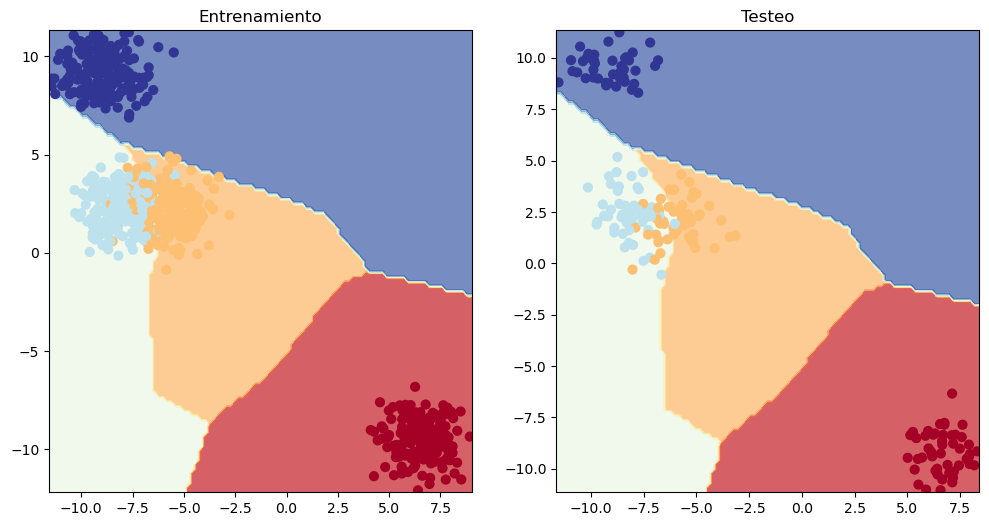

In [208]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Entrenamiento")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Testeo")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)